### Social Network Analysis with Python and NetworkX
- Social network analysis (SNA) is the process of investigating social structures through the use of networks and graph theory
+ networkx or igraph
+ pip install networkx
+ sudo apt-get install python-networkx

#### Dataset
+ Grey's Anatomy
+ US Presidents
- csv file
+ Dataset is 2 columns From/To
    + Get More Dataset 
    - http://snap.stanford.edu/data/
    - http://networkrepository.com/
    - http://www.sociopatterns.org/datasets/
    - http://kateto.net/2016/05/network-datasets/

![](snaimage.jpg)

![](id-program-network.jpg)

#### Terms
-  Graphs are pairwise relationships between objects and entities
+ Graph 
+ Nodes : individual objects or people or vertices
+ Edges : connections or relationship


+ A picture speaks a thousand words
+ A graph speaks more than 10 thousand words as well as relationships
+ A video speaks a million words

#### Usefulness and Application
+ To Find the most influential people in a network
+ To find relationships and connections among object
+ To detect hidden patterns eg Fraud detection in Bank Transactions
+ To find optimum routes eg in Supply chain,Drug and Truck delivery services
+ To find maximum coverage eg Telecom, Triangulation in FBI,CIA

#### Application
+ Path Optimization
+ Social Network Analysis
+ Most influential
+ Fraud Patterns

In [2]:
# Load Pkgs
import pandas as pd
import networkx as nx

# 
import warnings

In [13]:
df = pd.read_csv("us_edgelist.csv")

In [14]:
df.head()

,From,To
0,Clinton,Hillary
1,Bush,Laura
2,Obama,Michelle
3,Trump,Ivanka
4,Clinton,G.Bush


In [15]:
# Read Our Edgelist
us_graph = nx.from_pandas_edgelist(df,source="From",target="To")

In [16]:
type(us_graph)

networkx.classes.graph.Graph

In [17]:
# Info
nx.info(us_graph)

'Name: \nType: Graph\nNumber of nodes: 19\nNumber of edges: 21\nAverage degree:   2.2105'

In [18]:
# Check All Nodes/Object/People
us_graph.nodes()

NodeView(('Clinton', 'Hillary', 'Bush', 'Laura', 'Obama', 'Michelle', 'Trump', ' Ivanka', ' G.Bush ', 'Dole', 'Al Gore', 'Kerry', 'McCain', 'Romney', 'Bill', 'Ivanka', 'J. Thorn', 'T.Aitcheson', '\tCindy'))

In [19]:
len(us_graph.nodes())

19

# Check All Edges/Connections
us_graph.edges()

In [21]:
len(us_graph.edges())

21

In [22]:
us_graph.add_edge("Franklin","Lincoln")

In [23]:
us_graph.nodes()

NodeView(('Clinton', 'Hillary', 'Bush', 'Laura', 'Obama', 'Michelle', 'Trump', ' Ivanka', ' G.Bush ', 'Dole', 'Al Gore', 'Kerry', 'McCain', 'Romney', 'Bill', 'Ivanka', 'J. Thorn', 'T.Aitcheson', '\tCindy', 'Franklin', 'Lincoln'))

#### Visualization 

In [ ]:
# nx.draw
# nx.draw_networkx

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

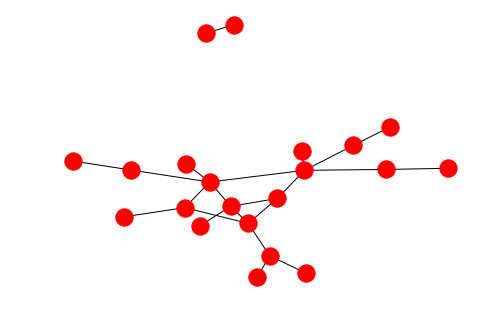

In [26]:
nx.draw(us_graph)

c:\users\this pc\appdata\local\programs\python\python36\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


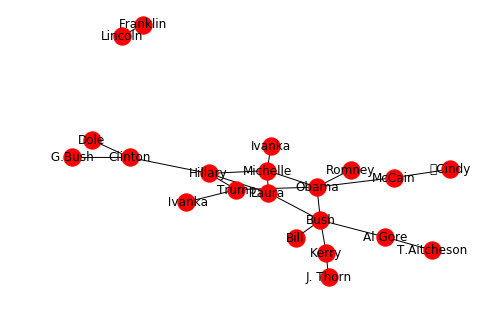

In [27]:
nx.draw(us_graph,with_labels=True)

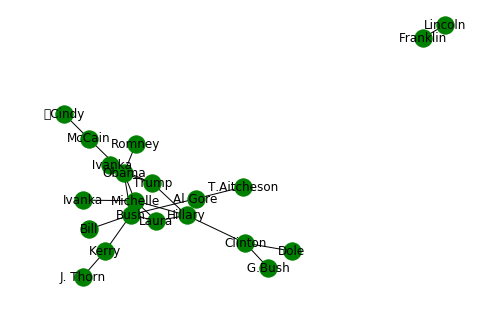

In [28]:
nx.draw(us_graph,with_labels=True,node_color='g')

c:\users\this pc\appdata\local\programs\python\python36\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


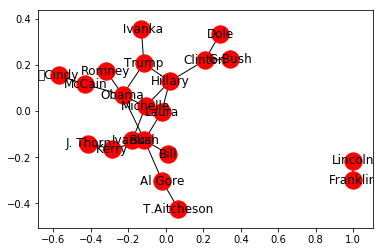

In [29]:
# method 2
nx.draw_networkx(us_graph)

c:\users\this pc\appdata\local\programs\python\python36\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


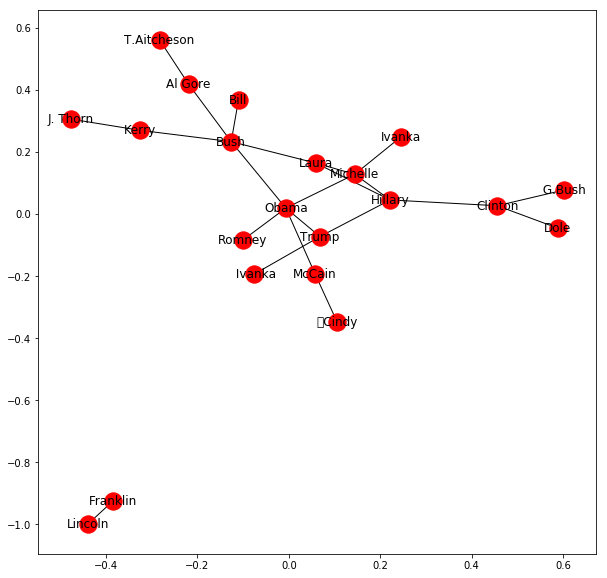

In [32]:
plt.figure(figsize=(10,10))
nx.draw_networkx(us_graph)
plt.show()

In [33]:
plt.savefig("usa_pres.png")

<Figure size 432x288 with 0 Axes>

### Analysis
+ Degree of Centrality
- Most Influential 
- Most important connection
- Best betweener
- Shortest Path

In [34]:
# General Connection
nx.degree(us_graph)

DegreeView({'Clinton': 3, 'Hillary': 4, 'Bush': 5, 'Laura': 3, 'Obama': 5, 'Michelle': 4, 'Trump': 3, ' Ivanka': 1, ' G.Bush ': 1, 'Dole': 1, 'Al Gore': 2, 'Kerry': 2, 'McCain': 2, 'Romney': 1, 'Bill': 1, 'Ivanka': 1, 'J. Thorn': 1, 'T.Aitcheson': 1, '\tCindy': 1, 'Franklin': 1, 'Lincoln': 1})

In [35]:
# Degree of Connection 
nx.degree(us_graph,"Obama")

5

In [36]:
nx.degree(us_graph,"Lincoln")

1

### Most Influential
+ nx.degree_centrality()

In [37]:
nx.degree_centrality(us_graph)

{'Clinton': 0.15000000000000002,
 'Hillary': 0.2,
 'Bush': 0.25,
 'Laura': 0.15000000000000002,
 'Obama': 0.25,
 'Michelle': 0.2,
 'Trump': 0.15000000000000002,
 ' Ivanka': 0.05,
 ' G.Bush ': 0.05,
 'Dole': 0.05,
 'Al Gore': 0.1,
 'Kerry': 0.1,
 'McCain': 0.1,
 'Romney': 0.05,
 'Bill': 0.05,
 'Ivanka': 0.05,
 'J. Thorn': 0.05,
 'T.Aitcheson': 0.05,
 '\tCindy': 0.05,
 'Franklin': 0.05,
 'Lincoln': 0.05}

In [41]:
sorted(nx.degree_centrality(us_graph).values())

[0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.1,
 0.1,
 0.1,
 0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002,
 0.2,
 0.2,
 0.25,
 0.25]

In [42]:
most_influential = nx.degree_centrality(us_graph)


In [43]:
for w in sorted(most_influential, key=most_influential.get, reverse=True):
    print(w, most_influential[w])

Bush 0.25
Obama 0.25
Hillary 0.2
Michelle 0.2
Clinton 0.15000000000000002
Laura 0.15000000000000002
Trump 0.15000000000000002
Al Gore 0.1
Kerry 0.1
McCain 0.1
 Ivanka 0.05
 G.Bush  0.05
Dole 0.05
Romney 0.05
Bill 0.05
Ivanka 0.05
J. Thorn 0.05
T.Aitcheson 0.05
	Cindy 0.05
Franklin 0.05
Lincoln 0.05


In [ ]:
### Most Important Connection
+ nx.eigenvector_centrality

In [44]:
nx.eigenvector_centrality(us_graph)

{'Clinton': 0.15152928713724503,
 'Hillary': 0.38442159441543317,
 'Bush': 0.3696180606401399,
 'Laura': 0.36852963127385646,
 'Obama': 0.4266565483896092,
 'Michelle': 0.41352797669954305,
 'Trump': 0.28433452527063385,
 ' Ivanka': 0.08974661863249653,
 ' G.Bush ': 0.04782770964575167,
 'Dole': 0.04782770964575167,
 'Al Gore': 0.12957724264199433,
 'Kerry': 0.12957724264199433,
 'McCain': 0.14957130173861363,
 'Romney': 0.13466969692277045,
 'Bill': 0.11666706333937449,
 'Ivanka': 0.13052504916898053,
 'J. Thorn': 0.04090043619100648,
 'T.Aitcheson': 0.04090043619100648,
 '\tCindy': 0.047210688306275804,
 'Franklin': 6.994359082336066e-10,
 'Lincoln': 6.994359082336066e-10}

In [45]:
most_important_link = nx.eigenvector_centrality(us_graph)

In [46]:
for w in sorted(most_important_link, key=most_important_link.get, reverse=True):
    print(w, most_important_link[w])

Obama 0.4266565483896092
Michelle 0.41352797669954305
Hillary 0.38442159441543317
Bush 0.3696180606401399
Laura 0.36852963127385646
Trump 0.28433452527063385
Clinton 0.15152928713724503
McCain 0.14957130173861363
Romney 0.13466969692277045
Ivanka 0.13052504916898053
Al Gore 0.12957724264199433
Kerry 0.12957724264199433
Bill 0.11666706333937449
 Ivanka 0.08974661863249653
 G.Bush  0.04782770964575167
Dole 0.04782770964575167
	Cindy 0.047210688306275804
J. Thorn 0.04090043619100648
T.Aitcheson 0.04090043619100648
Franklin 6.994359082336066e-10
Lincoln 6.994359082336066e-10


In [ ]:
# What is the shortest connection between Obama and Bill Clinton
+ Closeness central
nx.shortest_path

In [47]:
nx.shortest_path(us_graph,"Obama","Clinton")

['Obama', 'Trump', 'Hillary', 'Clinton']

In [48]:
nx.shortest_path(us_graph,"Trump","Bush")

['Trump', 'Obama', 'Bush']

In [49]:
nx.shortest_path(us_graph,"Ivanka","Laura")

['Ivanka', 'Michelle', 'Laura']

In [ ]:
### Betweener Centrality
+ Bridge/Connect

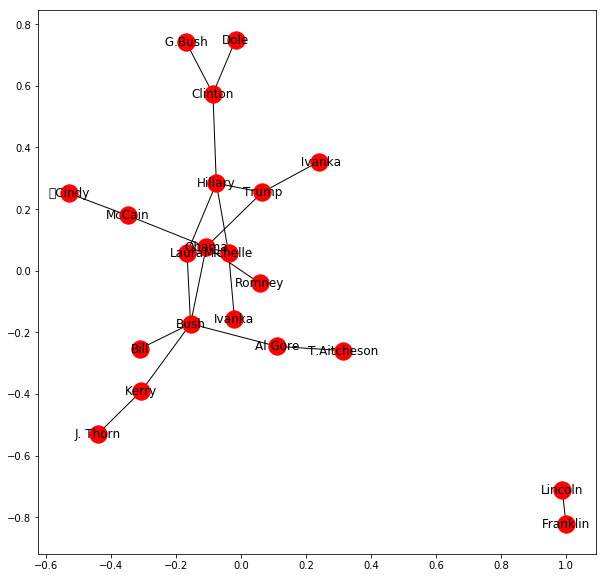

In [51]:
plt.figure(figsize=(10,10))
nx.draw_networkx(us_graph)
plt.show()

In [52]:
nx.betweenness_centrality(us_graph)

{'Clinton': 0.17368421052631577,
 'Hillary': 0.25789473684210523,
 'Bush': 0.39473684210526316,
 'Laura': 0.15789473684210525,
 'Obama': 0.3526315789473684,
 'Michelle': 0.14210526315789473,
 'Trump': 0.13157894736842105,
 ' Ivanka': 0.0,
 ' G.Bush ': 0.0,
 'Dole': 0.0,
 'Al Gore': 0.08947368421052632,
 'Kerry': 0.08947368421052632,
 'McCain': 0.08947368421052632,
 'Romney': 0.0,
 'Bill': 0.0,
 'Ivanka': 0.0,
 'J. Thorn': 0.0,
 'T.Aitcheson': 0.0,
 '\tCindy': 0.0,
 'Franklin': 0.0,
 'Lincoln': 0.0}

In [53]:
best_connector = nx.betweenness_centrality(us_graph)
for w in sorted(best_connector, key=best_connector.get, reverse=True):
    print(w, best_connector[w])

Bush 0.39473684210526316
Obama 0.3526315789473684
Hillary 0.25789473684210523
Clinton 0.17368421052631577
Laura 0.15789473684210525
Michelle 0.14210526315789473
Trump 0.13157894736842105
Al Gore 0.08947368421052632
Kerry 0.08947368421052632
McCain 0.08947368421052632
 Ivanka 0.0
 G.Bush  0.0
Dole 0.0
Romney 0.0
Bill 0.0
Ivanka 0.0
J. Thorn 0.0
T.Aitcheson 0.0
	Cindy 0.0
Franklin 0.0
Lincoln 0.0


#### Building A Subgroup 
+  Retrieve all the nodes connected to a given node within a NetworkX graph 
 - Method 1 Breadth-first search
 - Method 2 nx.node_connected_component(G,n)

In [56]:
group1 = nx.bfs_tree(us_graph,"Obama")

In [57]:
group2 = nx.bfs_tree(us_graph,"Bush")

In [58]:
group3 = nx.bfs_tree(us_graph,"Hillary")

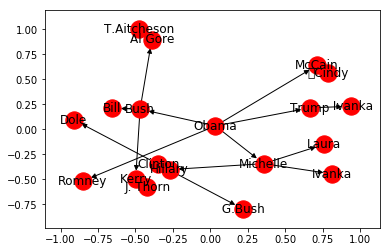

In [59]:
nx.draw_networkx(group1)

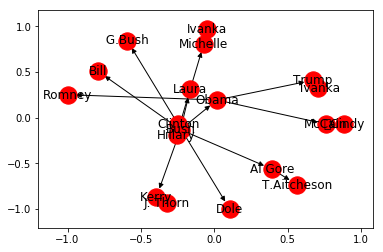

In [60]:
nx.draw_networkx(group2)

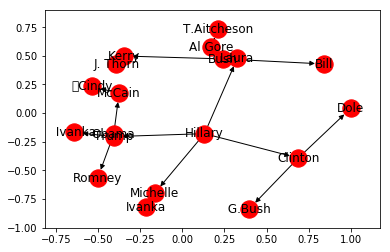

In [61]:
nx.draw_networkx(group3)

In [62]:
nx.node_connected_component(us_graph,"Trump")

{'\tCindy',
 ' G.Bush ',
 ' Ivanka',
 'Al Gore',
 'Bill',
 'Bush',
 'Clinton',
 'Dole',
 'Hillary',
 'Ivanka',
 'J. Thorn',
 'Kerry',
 'Laura',
 'McCain',
 'Michelle',
 'Obama',
 'Romney',
 'T.Aitcheson',
 'Trump'}

In [ ]:
### Association 
nx.clustering

In [63]:
nx.clustering(us_graph)

{'Clinton': 0,
 'Hillary': 0.16666666666666666,
 'Bush': 0,
 'Laura': 0.3333333333333333,
 'Obama': 0,
 'Michelle': 0.16666666666666666,
 'Trump': 0,
 ' Ivanka': 0,
 ' G.Bush ': 0,
 'Dole': 0,
 'Al Gore': 0,
 'Kerry': 0,
 'McCain': 0,
 'Romney': 0,
 'Bill': 0,
 'Ivanka': 0,
 'J. Thorn': 0,
 'T.Aitcheson': 0,
 '\tCindy': 0,
 'Franklin': 0,
 'Lincoln': 0}

In [ ]:
#### Thanks
# Jesus Saves @JCharisTech
# Jesse E.Agbe (JCharis)
# J-Secur1ty